## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
#importing libraries

In [3]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

In [4]:
#importing csv, tsv files

In [5]:
bom_movie_gross_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\bom.movie_gross.csv')
rt_movie_info_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.movie_info.tsv', sep='\t')
rt_reviews_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.reviews.tsv', sep='\t', encoding = 'unicode_escape')
tmbd_movies_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tmdb.movies.csv')
tn_movie_budgets_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tn.movie_budgets.csv')

In [42]:
### Exploratory analysis

In [43]:
#viewing first 5 rows of bom_movie_gross_df

In [44]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [45]:
#printing a summary of bom_movie_gross_df

In [46]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
#printing descriptive statistics of bom_movie_gross_df

In [48]:
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [49]:
#viewing first 5 rows of rt_movie_info_df

In [50]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [51]:
#printing a summary of rt_movie_info_df

In [52]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [53]:
#printing descriptive statistics of rt_movie_info_df

In [54]:
rt_movie_info_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [55]:
# printing the first 5 rows of rt_reviews_df

In [56]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [57]:
# printing a summary of rt_reviews_df

In [58]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [59]:
# printing descriptive statistics of rt_reviews_df

In [60]:
rt_reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [61]:
#printing first 5 rows of tmbd_movies_df

In [62]:
tmbd_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [63]:
# printing a summary of tmbd_movies_df

In [64]:
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [65]:
#printing descriptive statistics of tmbd_movies_df

In [66]:
tmbd_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [67]:
#printing first 5 rows of tn_movie_budgets_df

In [68]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
# printing a summary of tn_movie_budgets_df

In [70]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [71]:
#printing descriptive statistics of tn_movie_budgets_df

In [72]:
tn_movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [73]:
### tn_movie_budgets_df cleaning

In [74]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')#removing commas in column

In [75]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '')#removing $ in column

In [76]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')#removing commas in column

In [77]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '')#removing $ in column

In [78]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')#removing commas in column

In [79]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '')#removing $ from column

In [81]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('int64')#converting values to type integer in column

In [82]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('int')#converting values in column to integer type

In [83]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace('\d+', '') #removing digit chars from release date to convert to month only

In [84]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(',', '')#removing commas from release date column values

In [85]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(' ', '')#removing empty space from release date column values

In [86]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].astype('str')#changing release date to string type

In [87]:
tn_movie_budgets_df.drop(tn_movie_budgets_df[tn_movie_budgets_df['worldwide_gross'] == 0].index, inplace = True)#dropping rows with 0 ww gross

In [88]:
tn_movie_gross_head = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=False).head(10)#sorting values of worldwide gross by descending

In [89]:
### Graphing top ten worldwide gross

Text(0.5, 1.0, 'Movie Vs Worldwide Gross (Top Ten)')

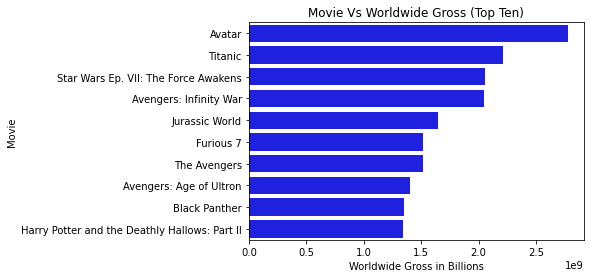

In [92]:
sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_head, color = 'Blue')

plt.xlabel('Worldwide Gross in Billions')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross (Top Ten)')

In [93]:
### Graphing production budget of top ten gross

Text(0.5, 1.0, 'Movie Vs Production Budget (Top Ten)')

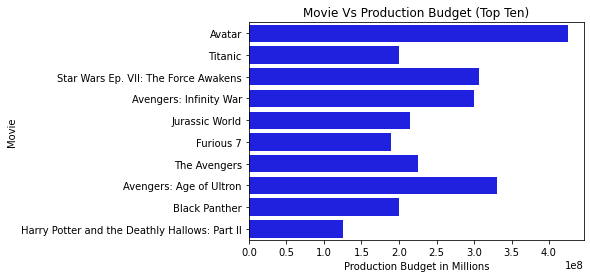

In [94]:
sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_head, color = 'Blue')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Top Ten)')

In [95]:
### Starting Graphs for bottom ten gross

In [96]:
tn_movie_gross_tail = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=True).head(10)#sorting values of worldwide gross by ascending

In [97]:
#graphing bottom ten worldwide gross

Text(0.5, 1.0, 'Movie Vs Worldwide Gross Bottom Ten')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


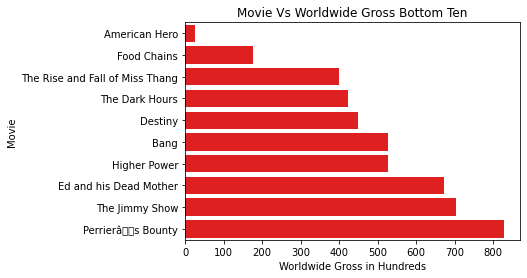

In [99]:
sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_tail, color = 'Red')

plt.xlabel('Worldwide Gross in Hundreds')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross Bottom Ten')

Text(0.5, 1.0, 'Movie Vs Production Budget (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


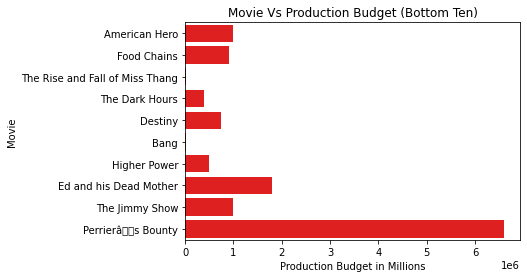

In [101]:
#making barplot for production budget of bottom ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_tail, color = 'Red')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Bottom Ten)')

In [ ]:
# Scatter plot to show 